In [1]:
import pyathena as pa
import pandas as pd
import xarray as xr
import glob
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Reading a history file:G:/yeongu//RPS_8pc_noICM_newacc/hst/RPS_8pc_noICM_newacc.hst.p
0.03992638645510294 0.1533415549097824
Reading a history file:G:/yeongu//RPS_8pc_ICM0_newacc/hst/RPS_8pc_ICM0_newacc.hst.p
0.0035891654266647305 0.06487051202079624
Reading a history file:G:/yeongu//RPS_8pc_ICM1_newacc/hst/RPS_8pc_ICM1_newacc.hst.p
0.042244691131223366 0.0902429930831434
Reading a history file:G:/yeongu//RPS_4pc_ICM1_newacc/hst/RPS_4pc_ICM1_newacc.hst.p
0.33559971376150677 0.1974894731377058
Reading a history file:G:/yeongu//RPS_8pc_ICM2_newacc/hst/RPS_8pc_ICM2_newacc.hst.p
9.514620836582758 2.3246366094072184
Reading a history file:G:/yeongu//RPS_4pc_ICM2_newacc/hst/RPS_4pc_ICM2_newacc.hst.p
8.361953232627208 1.7315220720095257
Reading a history file:G:/yeongu//RPS_8pc_ICM3_newacc/hst/RPS_8pc_ICM3_newacc.hst.p
8.117514573260955 4.603474036664652


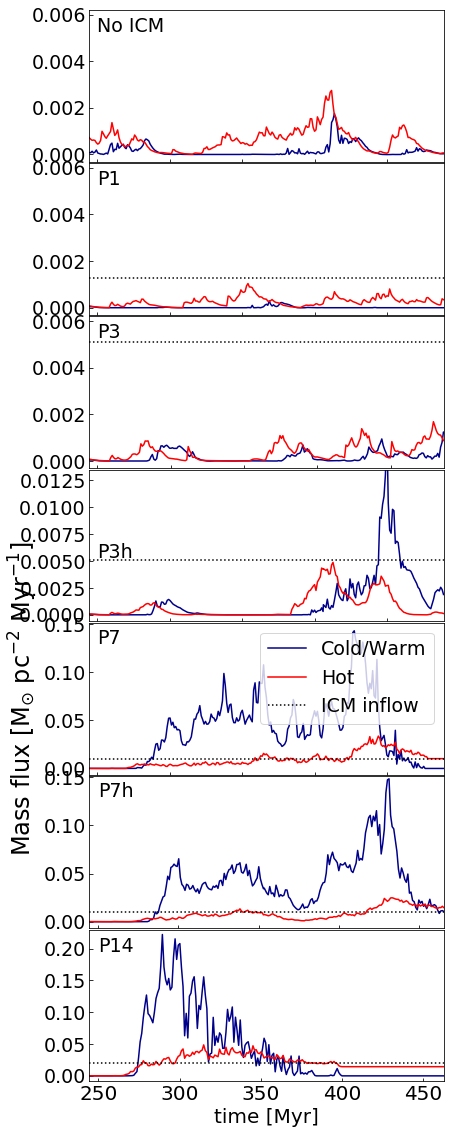

"\n    zpw=zprof_ds.to_array().sum(dim='variable')\n    #print zpw.loc['M3'][-1,:].data    \n    \n    zpw=zpw.sel(taxis=slice(250,500))\n    Munit=(unit['density']*unit['velocity']*unit['time']).to('Msun/pc^2').value\n    outflow=((zpw.loc['M3']/zpw.loc['A'])[-1,:].data).cumsum()*Munit*Myr\n    inflow=((zpw.loc['M3']/zpw.loc['A'])[0,:]).data.cumsum()*Munit*Myr\n    out=(hst_later.mass.iloc[0]-hst_later.mass-(hst_later.msp-hst_later.msp.iloc[0]))*Lz*(unit['density']*unit['length']).to('Msun/pc^2').value\n\n    if problem_id.startswith('RPS'):\n        l,=plt.plot(zpw.taxis*Myr,outflow,label=labels[j],lw=2)\n        plt.plot(zpw.taxis*Myr,inflow,color=l.get_color(),ls='--')\n        inflow_anal=(zpw.taxis-zpw.taxis[0])*Myr*par['d_icm']*par['v_icm']*(unit['density']*unit['velocity']*unit['time']).to('Msun/pc^2').value\n        #plt.plot(zpw.taxis*Myr,inflow_anal,color=l.get_color(),ls='--')\n    else:\n        outflow=outflow-inflow\n        l,=plt.plot(zpw.taxis*Myr,outflow,label=labels

In [3]:
import astropy.constants as c
import astropy.units as u
unit=pa.set_units(muH=1.4271)

plt.rcParams['font.size']=16
import os,glob
labels=['noICM_new','ICM1_new','ICM2_new'] # ['no ICM','ICM00','ICM0']#,'ICM00','ICM0',,'ICM2','ICM3','ICM4'
#ids=['RPS_8pc_noICM_newacc','RPS_8pc_ICM0_newacc','RPS_8pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_8pc_ICM3_newacc'] # RPS_8pc_ICM00','RPS_8pc_ICM0',,'RPS_8pc_ICM2','RPS_8pc_ICM3','RPS_8pc_ICM4'
#ids=['RPS_8pc_noICM_newacc','RPS_8pc_ICM0_newacc','RPS_8pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_8pc_ICM3_newacc']
ids=['RPS_8pc_noICM_newacc','RPS_8pc_ICM0_newacc','RPS_8pc_ICM1_newacc','RPS_4pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_4pc_ICM2_newacc','RPS_8pc_ICM3_newacc']

#base='G:/yeongu/'
base='G:/yeongu/'
#base2='D:/yeongu/'
#C = ('darkkhaki','b','r','k','g','magenta','cyan') # 
C = ('salmon','r','deepskyblue','b','g')
C2 = ('darkblue','deepskyblue','goldenrod','red','firebrick')
hh = [0.006,0.006,0.15]
#labell = ('No ICM','Very Weak', 'Weak', 'Strong','Very Strong')
labell = ('No ICM','P1', 'P3','P3h', 'P7','P7h','P14')
fig =plt.figure(figsize=(6,16))
for j,problem_id in enumerate(ids):
    #rstfiles=glob.glob('%s%s/id0/%s.????.rst' % (base,problem_id,problem_id))
    #rstfiles+=glob.glob('%s%s/rst/%s.????.rst' % (base,problem_id,problem_id))
    parfile='{}/{}/{}.par'.format(base,problem_id,problem_id)
    hstfile='{}/{}/hst/{}.hst'.format(base,problem_id,problem_id)
    hst=pa.hst_reader(hstfile)

    
    Myr=unit['time'].to('Myr').value
    hst.index=hst.time
    hst=hst.loc[250:500,:]
    hst.index=hst.time*Myr
    par=pa.get_params(parfile)
    
    Lx=par['x1max']-par['x1min']
    Ly=par['x2max']-par['x2min']
    Lz=par['x3max']-par['x3min']
    
    plist=['phase1','phase2','phase3','phase4','phase5']
    datasets = xr.Dataset()
    for phase in plist:
        path='{}{}/zprof_merged/{}.{}.zprof.nc'.format(base,problem_id,problem_id,phase)
        with xr.open_dataarray(path) as da: da.load()
        #print da
        datasets[phase]=da
    zprof_ds=datasets
    zprof_ds = zprof_ds.sel(taxis=slice(250,500))
    #print zprof_ds.fields
    Munit=(unit['density']*unit['velocity']*unit['time']).to('Msun/pc^2').value
    #print zprof_ds['phase1'].loc['A'].data.cumsum(), zprof_ds['phase2'].loc['A']

    plt.subplot(7,1,j+1)
    if j==0:
        cold = ((zprof_ds['phase1'].loc['M3'] + zprof_ds['phase2'].loc['M3'] + zprof_ds['phase3'].loc['M3'])[-1,:].data-(zprof_ds['phase1'].loc['M3'] + zprof_ds['phase2'].loc['M3'] + zprof_ds['phase3'].loc['M3'])[0,:].data)*Munit/(1024*1024)/Myr
        ion = ((zprof_ds['phase4'].loc['M3'])[-1,:].data-(zprof_ds['phase4'].loc['M3'])[0,:].data)*Munit/(1024*1024)/Myr
        hot = ((zprof_ds['phase5'].loc['M3'])[-1,:].data-(zprof_ds['phase5'].loc['M3'])[0,:].data)*Munit/(1024*1024)/Myr
    else:
        cold = (zprof_ds['phase1'].loc['M3'] + zprof_ds['phase2'].loc['M3'] + zprof_ds['phase3'].loc['M3'])[-1,:].data*Munit/(1024*1024)/Myr
        ion = (zprof_ds['phase4'].loc['M3'])[-1,:].data*Munit/(1024*1024)/Myr
        hot = (zprof_ds['phase5'].loc['M3'])[-1,:].data*Munit/(1024*1024)/Myr
        #icm = (zprof_ds.to_array().sum(dim='variable').loc['s3'])[-1,:].data*Munit*Myr/(1024*1024)
        
    hh = hot+ion
    
    #print zprof_ds.taxis,cold,hh
    plt.plot(zprof_ds.taxis*Myr,cold,label='Cold/Warm',color=C2[0])
    plt.plot(zprof_ds.taxis*Myr,hh,label='Hot',color=C2[3])
    print np.cumsum(cold)[-1],np.cumsum(hh)[-1]
    '''
    if j==0 or j==1 or j==2:
        hh=0.0062*0.85
    elif j==3:
        hh=0.152*0.85
    elif j==4:
        hh=0.23*0.85
    plt.text(250,hh,'%s' % labell[j],fontsize=19)
    '''
    if j==0 or j==1 or j==2 or j==3:
        hh=0.0062*0.85
    elif j==4 or j==5:
        hh=0.152*0.85
    elif j==6:
        hh=0.23*0.85
    plt.text(250,hh,'%s' % labell[j],fontsize=19)
    
    icm_c = 'green'
    
    time=np.array(zprof_ds.taxis*Myr)
    
    if j == 0:
        plt.ylim(-0.00031,0.0062)
    elif j== 1: # ICM 0
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002/4  # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.000275, 0.0055)
        plt.ylim(-0.00031, 0.0062) # for 3 kpc
        #plt.ylim(-0.0325, 0.027) # for 2 kpc
    elif j== 2 : # ICM 1
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002 # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.0175, 0.39)
        plt.ylim(-0.00031, 0.0062) # for 3 kpc
        #plt.ylim(-0.033, 0.131) # for 2 kpc
    elif j==3: # ICM 1
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002 # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.0175, 0.39)
        plt.ylim(-0.00062, 0.0135) # for 3 kpc
        #plt.ylim(-0.033, 0.131) # for 2 kpc
    elif j== 4 or j==5: # ICM 2
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002 * 2 # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.0175, 0.39)
        plt.ylim(-0.00655, 0.151) # for 3 kpc
        #plt.ylim(-0.033, 0.131) # for 2 kpc
    elif j== 6: # ICM 3
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002 * 4 # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.0175, 0.39)
        plt.ylim(-0.00855, 0.23) # for 3 kpc
        #plt.ylim(-0.033, 0.131) # for 2 kpc
    
    
    if j==4:
        plt.legend(loc=0,fontsize=19)
        plt.ylabel(r'Mass flux [M$_{\odot}$ pc$^{-2}$ Myr$^{-1}$]', fontsize=24)
    if j==6:
        plt.xlabel(r'time [Myr]',fontsize=20)
        plt.xticks([250,300,350,400,450],fontsize=20)
    else :
        plt.xticks([250, 300, 350, 400, 450],[])
    plt.yticks(fontsize=19)
    plt.xlim(time[0],time[-1])
    plt.tick_params(direction='in')
    plt.locator_params(axis='y', nbins=6)
    
plt.subplots_adjust(bottom=0.06,top=0.99,hspace = .01,left=0.17,right=0.99)
                    
#ax = fig.add_subplot(111,frameon=False)
#ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
#ax.spines['top'].set_color('none')
#ax.spines['bottom'].set_color('none')
#ax.spines['left'].set_color('none')
#ax.spines['right'].set_color('none')
#ax.patch.set_facecolor('None')
#ax.set_ylabel(r'Mass flux [M$_{\odot}$ pc$^{-2}$ Myr$^{-1}$]', fontsize=24,labelpad=40)
#plt.minorticks_on()
#plt.axes().tick_params(which='minor', direction='in')
#plt.axes().tick_params(which='major', direction='in',labelsize=22)
#plt.tight_layout()
#plt.savefig('D:/yeongu/plots/Massflux_old1.png',dpi=300)
#plt.savefig('D:/yeongu/plots/Massflux_old1.eps', format='eps')
plt.show()


'''
    zpw=zprof_ds.to_array().sum(dim='variable')
    #print zpw.loc['M3'][-1,:].data    
    
    zpw=zpw.sel(taxis=slice(250,500))
    Munit=(unit['density']*unit['velocity']*unit['time']).to('Msun/pc^2').value
    outflow=((zpw.loc['M3']/zpw.loc['A'])[-1,:].data).cumsum()*Munit*Myr
    inflow=((zpw.loc['M3']/zpw.loc['A'])[0,:]).data.cumsum()*Munit*Myr
    out=(hst_later.mass.iloc[0]-hst_later.mass-(hst_later.msp-hst_later.msp.iloc[0]))*Lz*(unit['density']*unit['length']).to('Msun/pc^2').value

    if problem_id.startswith('RPS'):
        l,=plt.plot(zpw.taxis*Myr,outflow,label=labels[j],lw=2)
        plt.plot(zpw.taxis*Myr,inflow,color=l.get_color(),ls='--')
        inflow_anal=(zpw.taxis-zpw.taxis[0])*Myr*par['d_icm']*par['v_icm']*(unit['density']*unit['velocity']*unit['time']).to('Msun/pc^2').value
        #plt.plot(zpw.taxis*Myr,inflow_anal,color=l.get_color(),ls='--')
    else:
        outflow=outflow-inflow
        l,=plt.plot(zpw.taxis*Myr,outflow,label=labels[j],lw=2)
    
    plt.yscale('log')
'''


Reading a history file:G:/yeongu//RPS_8pc_noICM_newacc/hst/RPS_8pc_noICM_newacc.hst.p
0 0.001760209666832823 0.0013643986361917763 0.0017568317528167323
Reading a history file:G:/yeongu//RPS_8pc_ICM0_newacc/hst/RPS_8pc_ICM0_newacc.hst.p
1 0.00029425449292530634 0.00024013804009909091 0.0009877715428905853
Reading a history file:G:/yeongu//RPS_8pc_ICM1_newacc/hst/RPS_8pc_ICM1_newacc.hst.p
2 0.0012437775232709656 0.0007419130638823713 0.00131552207788767
Reading a history file:G:/yeongu//RPS_4pc_ICM1_newacc/hst/RPS_4pc_ICM1_newacc.hst.p
3 0.017611292574859855 0.002402814810506907 0.004265734390380923
Reading a history file:G:/yeongu//RPS_8pc_ICM2_newacc/hst/RPS_8pc_ICM2_newacc.hst.p
4 0.14292918042718522 0.017200049224132017 0.020144441342617912
Reading a history file:G:/yeongu//RPS_4pc_ICM2_newacc/hst/RPS_4pc_ICM2_newacc.hst.p
5 0.14839107097685525 0.013193471699303306 0.015352412813273776
Reading a history file:G:/yeongu//RPS_8pc_ICM3_newacc/hst/RPS_8pc_ICM3_newacc.hst.p
6 0.2222433514

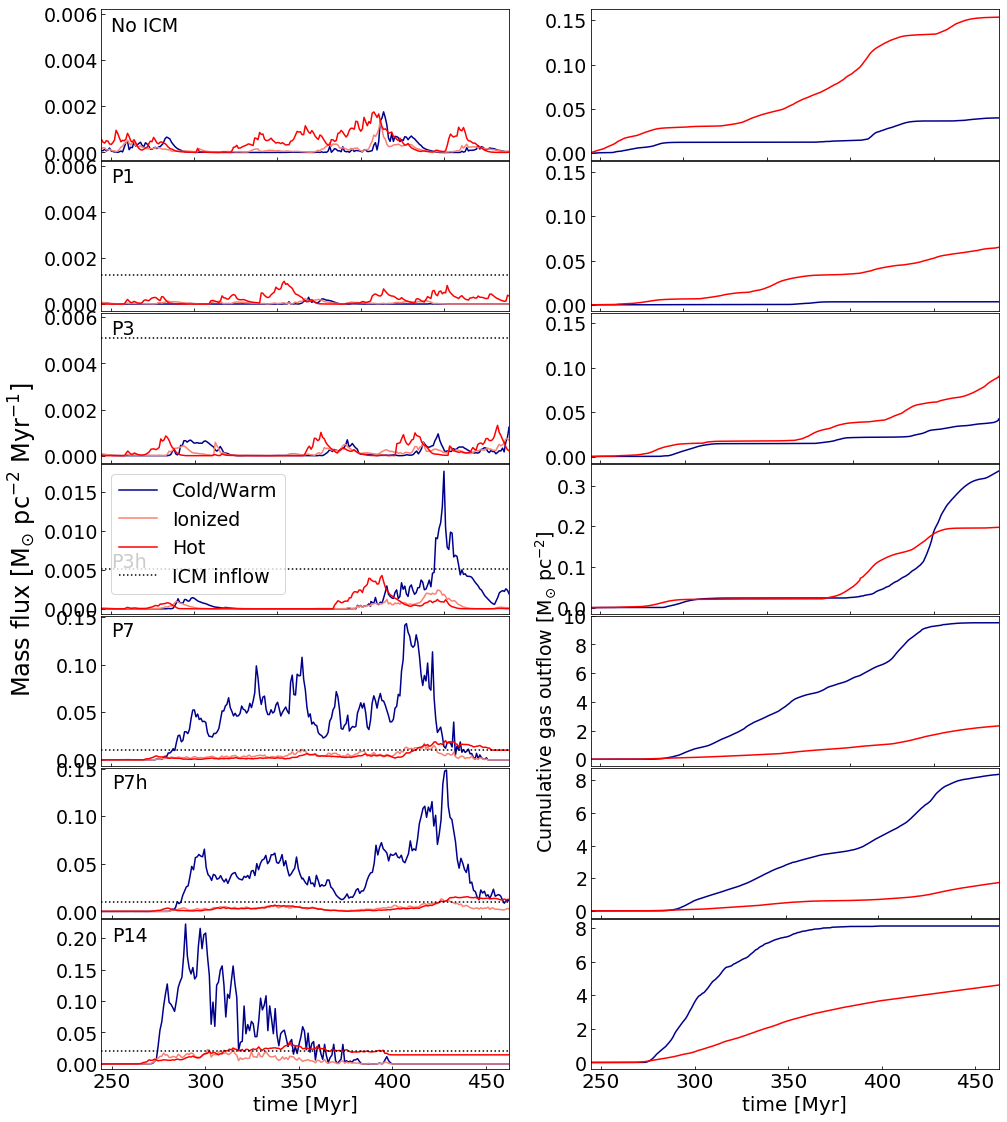

In [5]:
import astropy.constants as c
import astropy.units as u
unit=pa.set_units(muH=1.4271)

plt.rcParams['font.size']=16
import os,glob
labels=['noICM_new','ICM1_new','ICM2_new'] # ['no ICM','ICM00','ICM0']#,'ICM00','ICM0',,'ICM2','ICM3','ICM4'
#ids=['RPS_8pc_noICM_newacc','RPS_8pc_ICM0_newacc','RPS_8pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_8pc_ICM3_newacc'] # RPS_8pc_ICM00','RPS_8pc_ICM0',,'RPS_8pc_ICM2','RPS_8pc_ICM3','RPS_8pc_ICM4'
#ids=['RPS_8pc_noICM_newacc','RPS_8pc_ICM0_newacc','RPS_8pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_8pc_ICM3_newacc']
ids=['RPS_8pc_noICM_newacc','RPS_8pc_ICM0_newacc','RPS_8pc_ICM1_newacc','RPS_4pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_4pc_ICM2_newacc','RPS_8pc_ICM3_newacc']

#base='G:/yeongu/'
base='G:/yeongu/'

#C = ('darkkhaki','b','r','k','g','magenta','cyan') # 
C = ('salmon','r','deepskyblue','b','g')
C2 = ('darkblue','deepskyblue','goldenrod','red','firebrick')
hh = (0.06,0.06,0.15)
labell = ('No ICM','P1', 'P3','P3h', 'P7','P7h','P14')
fig =plt.figure(figsize=(14,16))
for j,problem_id in enumerate(ids):
    #rstfiles=glob.glob('%s%s/id0/%s.????.rst' % (base,problem_id,problem_id))
    #rstfiles+=glob.glob('%s%s/rst/%s.????.rst' % (base,problem_id,problem_id))

    parfile='{}/{}/{}.par'.format(base,problem_id,problem_id)
    hstfile='{}/{}/hst/{}.hst'.format(base,problem_id,problem_id)
    hst=pa.hst_reader(hstfile)

    
    Myr=unit['time'].to('Myr').value
    hst.index=hst.time
    hst=hst.loc[250:500,:]
    hst.index=hst.time*Myr
    par=pa.get_params(parfile)
    
    Lx=par['x1max']-par['x1min']
    Ly=par['x2max']-par['x2min']
    Lz=par['x3max']-par['x3min']
    
    plist=['phase1','phase2','phase3','phase4','phase5']
    datasets = xr.Dataset()
    for phase in plist:
        path='{}{}/zprof_merged/{}.{}.zprof.nc'.format(base,problem_id,problem_id,phase)
        with xr.open_dataarray(path) as da: da.load()
        #print da
        datasets[phase]=da
    zprof_ds=datasets
    zprof_ds = zprof_ds.sel(taxis=slice(250,500))
    #print zprof_ds.fields
    Munit=(unit['density']*unit['velocity']*unit['time']).to('Msun/pc^2').value
    #print zprof_ds['phase1'].loc['A'].data.cumsum(), zprof_ds['phase2'].loc['A']
    #print zprof_ds['phase1'].loc['M3'][-1:]
    
    time=np.array(zprof_ds.taxis*Myr)
    
########## Cumulaitve ###########

    plt.subplot(len(ids),2,2*j+2)
    if j==0:
        cold = ((zprof_ds['phase1'].loc['M3'] + zprof_ds['phase2'].loc['M3'] + zprof_ds['phase3'].loc['M3'])[-1,:].data.cumsum()-(zprof_ds['phase1'].loc['M3'] + zprof_ds['phase2'].loc['M3'] + zprof_ds['phase3'].loc['M3'])[0,:].data.cumsum())*Munit/Myr/(1024*1024)
        ion = ((zprof_ds['phase4'].loc['M3'])[-1,:].data.cumsum()-(zprof_ds['phase4'].loc['M3'])[0,:].data.cumsum())*Munit/Myr/(1024*1024)
        hot = ((zprof_ds['phase5'].loc['M3'])[-1,:].data.cumsum()-(zprof_ds['phase5'].loc['M3'])[0,:].data.cumsum())*Munit/Myr/(1024*1024)
    else:
        cold = (zprof_ds['phase1'].loc['M3'] + zprof_ds['phase2'].loc['M3'] + zprof_ds['phase3'].loc['M3'])[-1,:].data.cumsum()*Munit/Myr/(1024*1024)
        ion = (zprof_ds['phase4'].loc['M3'])[-1,:].data.cumsum()*Munit/Myr/(1024*1024)
        hot = (zprof_ds['phase5'].loc['M3'])[-1,:].data.cumsum()*Munit/Myr/(1024*1024)
    hh = hot+ion
    plt.plot(zprof_ds.taxis*Myr,cold,label='Cold/Warm',color=C2[0])
    plt.plot(zprof_ds.taxis*Myr,hh,label='Hot',color=C2[3])
    if j == 0 or j==1 or j==2:
        plt.ylim(-0.007,0.162)
    if j==len(ids)-:
        plt.ylabel(r'Cumulative gas outflow [M$_{\odot}$ pc$^{-2}$]',fontsize=19)
    if j==len(ids)-1:
        plt.xlabel(r'time [Myr]',fontsize=20)
        plt.xticks([250,300,350,400,450],fontsize=20)
    else :
        plt.xticks([250, 300, 350, 400, 450],[])
    plt.yticks(fontsize=19)
    plt.xlim(time[0],time[-1])
    plt.tick_params(direction='in')
    plt.locator_params(axis='y', nbins=6)
    
################################################################################################    
    
    plt.subplot(len(ids),2,2*j+1)
    if j==0:
        cold = ((zprof_ds['phase1'].loc['M3'] + zprof_ds['phase2'].loc['M3'] + zprof_ds['phase3'].loc['M3'])[-1,:].data-(zprof_ds['phase1'].loc['M3'] + zprof_ds['phase2'].loc['M3'] + zprof_ds['phase3'].loc['M3'])[0,:].data)*Munit/Myr/(1024*1024)
        ion = ((zprof_ds['phase4'].loc['M3'])[-1,:].data-(zprof_ds['phase4'].loc['M3'])[0,:].data)*Munit/Myr/(1024*1024)
        hot = ((zprof_ds['phase5'].loc['M3'])[-1,:].data-(zprof_ds['phase5'].loc['M3'])[0,:].data)*Munit/Myr/(1024*1024)
    else:
        cold = (zprof_ds['phase1'].loc['M3'] + zprof_ds['phase2'].loc['M3'] + zprof_ds['phase3'].loc['M3'])[-1,:].data*Munit/Myr/(1024*1024)
        ion = (zprof_ds['phase4'].loc['M3'])[-1,:].data*Munit/Myr/(1024*1024)
        hot = (zprof_ds['phase5'].loc['M3'])[-1,:].data*Munit/Myr/(1024*1024)
        #icm = (zprof_ds.to_array().sum(dim='variable').loc['s3'])[-1,:].data*Munit*Myr/(1024*1024)
        
    hh = hot+ion
    
    #print zprof_ds.taxis,cold,hh
    plt.plot(zprof_ds.taxis*Myr,cold,label='Cold/Warm',color=C2[0])
    plt.plot(zprof_ds.taxis*Myr,ion,label='Ionized',color='salmon')
    plt.plot(zprof_ds.taxis*Myr,hot,label='Hot',color=C2[3])
    print j, cold.max(), ion.max(), hot.max()

    if j==0 or j==1 or j==2 or j==3:
        hh=0.0062*0.85
    elif j==4 or j==5:
        hh=0.152*0.85
    elif j==6:
        hh=0.23*0.85
    plt.text(250,hh,'%s' % labell[j],fontsize=19)
    
    icm_c = 'green'
    
    time=np.array(zprof_ds.taxis*Myr)
    
    if j == 0:
        plt.ylim(-0.00031,0.0062)
    elif j== 1: # ICM 0
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002/4  # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.000275, 0.0055)
        plt.ylim(-0.00031, 0.0062) # for 3 kpc
        #plt.ylim(-0.0325, 0.027) # for 2 kpc
    elif j== 2 : # ICM 1
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002 # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.0175, 0.39)
        plt.ylim(-0.00031, 0.0062) # for 3 kpc
        #plt.ylim(-0.033, 0.131) # for 2 kpc
    elif j==3: # ICM 1
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002 # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.0175, 0.39)
        plt.ylim(-0.00072, 0.0185) # for 3 kpc
        #plt.ylim(-0.033, 0.131) # for 2 kpc
    elif j== 4 or j==5: # ICM 2
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002 * 2 # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.0175, 0.39)
        plt.ylim(-0.00655, 0.151) # for 3 kpc
        #plt.ylim(-0.033, 0.131) # for 2 kpc
    elif j== 6: # ICM 3
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002 * 4 # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.0175, 0.39)
        plt.ylim(-0.00855, 0.23) # for 3 kpc
        #plt.ylim(-0.033, 0.131) # for 2 kpc
    
    if j==3:
        plt.legend(loc=0,fontsize=19)
        plt.ylabel(r'Mass flux [M$_{\odot}$ pc$^{-2}$ Myr$^{-1}$]', fontsize=24)
    if j==6:
        plt.xlabel(r'time [Myr]',fontsize=20)
        plt.xticks([250,300,350,400,450],fontsize=20)
    else :
        plt.xticks([250, 300, 350, 400, 450],[])
    plt.yticks(fontsize=19)
    plt.xlim(time[0],time[-1])
    plt.tick_params(direction='in')
    plt.locator_params(axis='y', nbins=6)
    #plt.legend()
plt.subplots_adjust(bottom=0.07,top=0.99,hspace = .01,wspace=0.2,left=0.1,right=0.99)
    
#ax = fig.add_subplot(111,frameon=False)
#ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
#ax.spines['top'].set_color('none')
#ax.spines['bottom'].set_color('none')
#ax.spines['left'].set_color('none')
#ax.spines['right'].set_color('none')
#ax.patch.set_facecolor('None')
#ax.set_ylabel(r'Mass flux [M$_{\odot}$ pc$^{-2}$ Myr$^{-1}$]', fontsize=24,labelpad=40)
#plt.minorticks_on()
#plt.axes().tick_params(which='minor', direction='in')
#plt.axes().tick_params(which='major', direction='in',labelsize=22)
#plt.tight_layout(pad=0.1)
#plt.savefig('D:/yeongu/plots/Massflux_NEW2.png',dpi=300)
#plt.savefig('D:/yeongu/plots/Massflux_new1.eps', format='eps')
plt.show()


Reading a history file:G:/yeongu//RPS_8pc_noICM_newacc/hst/RPS_8pc_noICM_newacc.hst.p
0.0352682242985 solMass / pc3


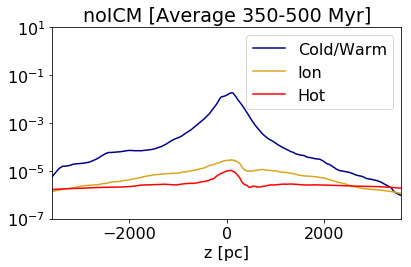

Reading a history file:G:/yeongu//RPS_8pc_ICM0_newacc/hst/RPS_8pc_ICM0_newacc.hst.p
0.0352682242985 solMass / pc3


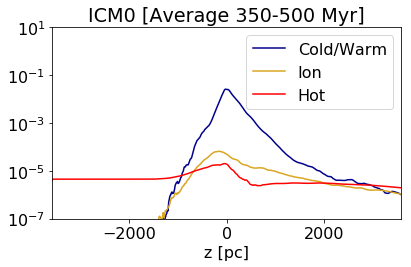

Reading a history file:G:/yeongu//RPS_8pc_ICM1_newacc/hst/RPS_8pc_ICM1_newacc.hst.p
0.0352682242985 solMass / pc3


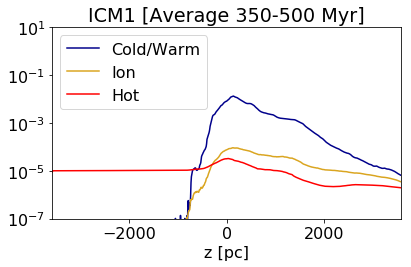

Reading a history file:G:/yeongu//RPS_8pc_ICM2_newacc/hst/RPS_8pc_ICM2_newacc.hst.p
0.0352682242985 solMass / pc3


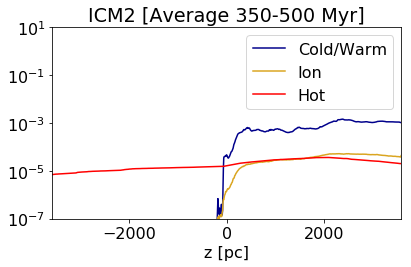

Reading a history file:G:/yeongu//RPS_8pc_ICM3_newacc/hst/RPS_8pc_ICM3_newacc.hst.p
0.0352682242985 solMass / pc3


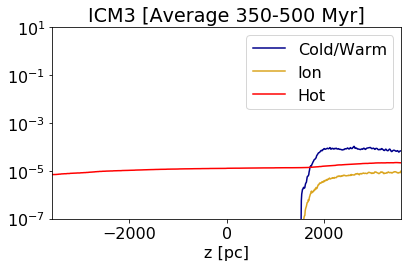

In [29]:
import astropy.constants as c
import astropy.units as u
unit=pa.set_units(muH=1.4271)

plt.rcParams['font.size']=16
import os,glob
labels=['noICM','ICM0','ICM1','ICM2','ICM3'] # ['no ICM','ICM00','ICM0']#,'ICM00','ICM0',,'ICM2','ICM3','ICM4'
#ids=['RPS_8pc_noICM_newacc','RPS_8pc_ICM0_newacc','RPS_8pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_8pc_ICM3_newacc'] # RPS_8pc_ICM00','RPS_8pc_ICM0',,'RPS_8pc_ICM2','RPS_8pc_ICM3','RPS_8pc_ICM4'
ids=['RPS_8pc_noICM_newacc','RPS_8pc_ICM0_newacc','RPS_8pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_8pc_ICM3_newacc']
base='G:/yeongu/'
#base='F:/yeongu/'
#base2='D:/yeongu/'
#C = ('darkkhaki','b','r','k','g','magenta','cyan') # 
C = ('salmon','r','deepskyblue','b','g')
C2 = ('darkblue','deepskyblue','goldenrod','red','firebrick')
hh = [0.006,0.006,0.15]
labell = ('No ICM','Very Weak', 'Weak', 'Strong','Very Strong')
#fig =plt.figure(figsize=(7.5,12))
for j,problem_id in enumerate(ids):
    #rstfiles=glob.glob('%s%s/id0/%s.????.rst' % (base,problem_id,problem_id))
    #rstfiles+=glob.glob('%s%s/rst/%s.????.rst' % (base,problem_id,problem_id))
    parfile='{}/{}/{}.par'.format(base,problem_id,problem_id)
    hstfile='{}/{}/hst/{}.hst'.format(base,problem_id,problem_id)
    hst=pa.hst_reader(hstfile)

    
    Myr=unit['time'].to('Myr').value
    hst.index=hst.time
    hst=hst.loc[250:500,:]
    hst.index=hst.time*Myr
    par=pa.get_params(parfile)
    
    Lx=par['x1max']-par['x1min']
    Ly=par['x2max']-par['x2min']
    Lz=par['x3max']-par['x3min']
    
    plist=['phase1','phase2','phase3','phase4','phase5']
    datasets = xr.Dataset()
    for phase in plist:
        path='{}{}/zprof_merged/{}.{}.zprof.nc'.format(base,problem_id,problem_id,phase)
        with xr.open_dataarray(path) as da: da.load()
        #print da
        datasets[phase]=da
    zprof_ds=datasets
    zprof_ds = zprof_ds.sel(taxis=slice(350,500))
    #print zprof_ds.fields
    Munit=(unit['density']*unit['velocity']*unit['time']).to('Msun/pc^2').value
    print unit['density']
    #print zprof_ds['phase1'].loc['A'].data.cumsum(), zprof_ds['phase2'].loc['A']
    #print np.mean(zprof_ds['phase1'].loc['d'],axis=1)
    cw = np.add(np.add(np.mean(zprof_ds['phase1'].loc['d'],axis=1),np.mean(zprof_ds['phase2'].loc['d'],axis=1)),np.mean(zprof_ds['phase3'].loc['d'],axis=1))*unit['density']/(1024*1024) 
    ion = np.mean(zprof_ds['phase4'].loc['d'],axis=1)*unit['density']/(1024*1024)
    hot = np.mean(zprof_ds['phase5'].loc['d'],axis=1)*unit['density']/(1024*1024)

    
    z = zprof_ds.zaxis
    #print zprof_ds.taxis,cold,hh
    plt.semilogy(z,cw,label='Cold/Warm',color=C2[0])
    plt.semilogy(z,ion,label='Ion',color=C2[2])
    plt.semilogy(z,hot,label='Hot',color=C2[3])
    plt.ylim(1e-7,1e1)
    plt.xlabel('z [pc]')
    plt.xlim(z.min(),z.max())
    plt.legend(loc=0)
    plt.title('%s [Average 350-500 Myr]' % labels[j])
    plt.tight_layout()
    plt.savefig('D:/yeongu/plots/Density_prof_%s.png' % labels[j],dpi=300)
    plt.show()
    '''
    if j==0 or j==1 or j==2:
        hh=0.0062*0.85
    elif j==3:
        hh=0.152*0.85
    elif j==4:
        hh=0.23*0.85
    plt.text(250,hh,'%s' % labell[j],fontsize=19)
    
    icm_c = 'green'
    
    time=np.array(zprof_ds.taxis*Myr)
    
    if j == 0:
        plt.ylim(-0.00031,0.0062)
    elif j== 1: # ICM 0
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002/4  # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.000275, 0.0055)
        plt.ylim(-0.00031, 0.0062) # for 3 kpc
        #plt.ylim(-0.0325, 0.027) # for 2 kpc
    elif j== 2: # ICM 1
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002 # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.0175, 0.39)
        plt.ylim(-0.00031, 0.0062) # for 3 kpc
        #plt.ylim(-0.033, 0.131) # for 2 kpc
    elif j== 3: # ICM 2
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002 * 2 # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.0175, 0.39)
        plt.ylim(-0.00655, 0.151) # for 3 kpc
        #plt.ylim(-0.033, 0.131) # for 2 kpc
    elif j== 4: # ICM 3
        #plt.plot(time, icm, label='ICM outflow', color=icm_c,ls='--')
        icm_inflow = 0.0051002 * 4 # m_d_cuw + m_d_hi
        plt.axhline(icm_inflow,label='ICM inflow',ls=':',color='k')
        #plt.ylim(-0.0175, 0.39)
        plt.ylim(-0.00855, 0.23) # for 3 kpc
        #plt.ylim(-0.033, 0.131) # for 2 kpc
    
    
    if j==2:
        plt.legend(loc=0,fontsize=19)
        plt.ylabel(r'Mass flux [M$_{\odot}$ pc$^{-2}$ Myr$^{-1}$]', fontsize=24)
    if j==4:
        plt.xlabel(r'time [Myr]',fontsize=20)
        plt.xticks([250,300,350,400,450],fontsize=20)
    else :
        plt.xticks([250, 300, 350, 400, 450],[])
    plt.yticks(fontsize=19)
    plt.xlim(time[0],time[-1])
    plt.tick_params(direction='in')
    plt.locator_params(axis='y', nbins=6)
    
plt.subplots_adjust(bottom=0.06,top=0.99,hspace = .01,left=0.17,right=0.99)
                    
#ax = fig.add_subplot(111,frameon=False)
#ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
#ax.spines['top'].set_color('none')
#ax.spines['bottom'].set_color('none')
#ax.spines['left'].set_color('none')
#ax.spines['right'].set_color('none')
#ax.patch.set_facecolor('None')
#ax.set_ylabel(r'Mass flux [M$_{\odot}$ pc$^{-2}$ Myr$^{-1}$]', fontsize=24,labelpad=40)
#plt.minorticks_on()
#plt.axes().tick_params(which='minor', direction='in')
#plt.axes().tick_params(which='major', direction='in',labelsize=22)
#plt.tight_layout()
plt.savefig('D:/yeongu/plots/Density_prof.png',dpi=300)
#plt.savefig('D:/yeongu/plots/Massflux_old1.eps', format='eps')
plt.show()
'''